In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Titanic.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
print("shape",df.shape)

shape (418, 12)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
df.isnull().sum().sort_values(ascending=False)

,0
Cabin,327
Age,86
Fare,1
PassengerId,0
Name,0
Pclass,0
Survived,0
Sex,0
Parch,0
SibSp,0


In [13]:
df['Survived'].value_counts()


,count
Survived,
0,266
1,152


In [14]:
surv_rate = df['Survived'].mean()
print("Overall survival rate:", round(surv_rate, 3))


Overall survival rate: 0.364


In [15]:
cat_cols = ['Sex', 'Pclass', 'Embarked']

for col in cat_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())



Column: Sex
Sex
male      266
female    152
Name: count, dtype: int64

Column: Pclass
Pclass
3    218
1    107
2     93
Name: count, dtype: int64

Column: Embarked
Embarked
S    270
C    102
Q     46
Name: count, dtype: int64


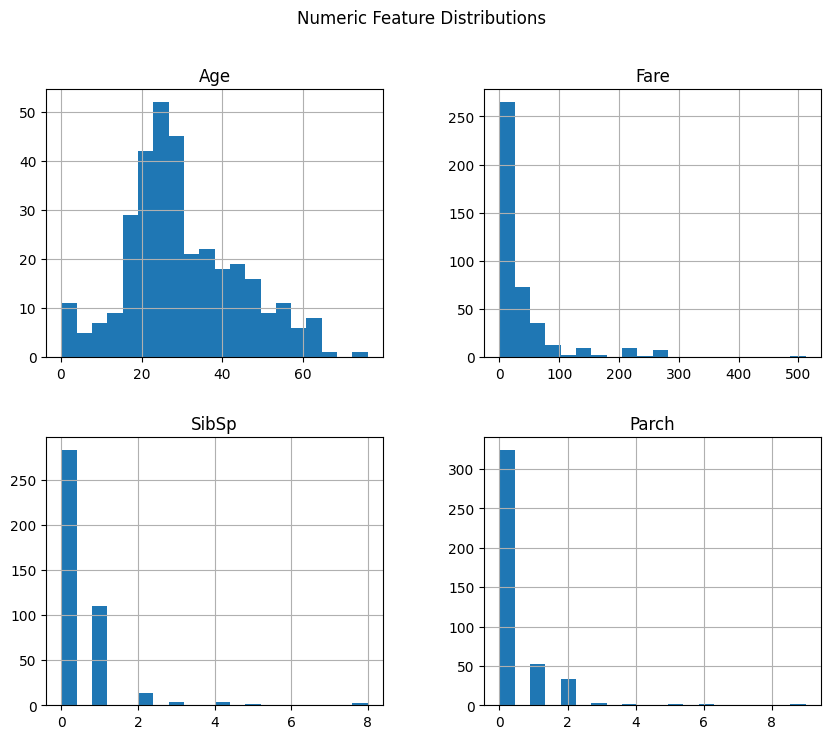

In [16]:
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

df[num_cols].hist(figsize=(10,8), bins=20)
plt.suptitle("Numeric Feature Distributions")
plt.show()


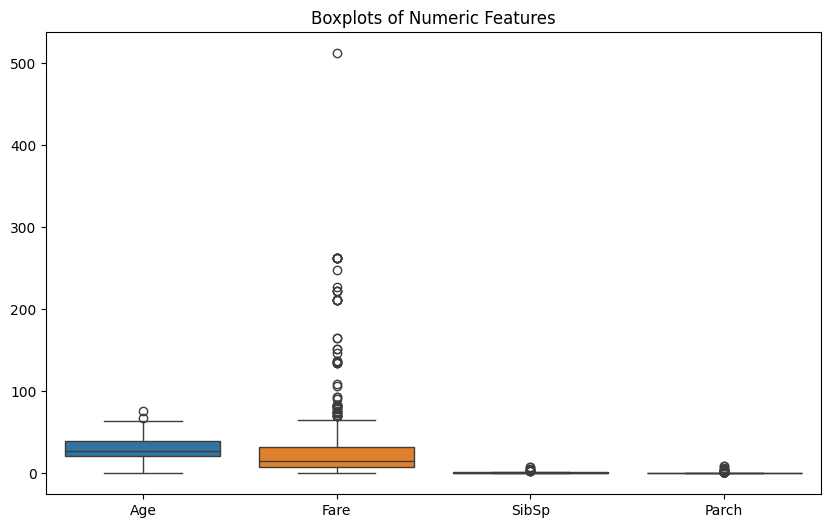

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[num_cols])
plt.title("Boxplots of Numeric Features")
plt.show()


In [18]:
df.groupby("Sex")["Survived"].mean()



,Survived
Sex,
female,1.0
male,0.0


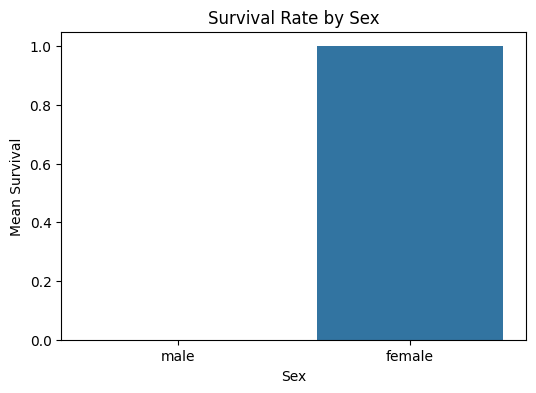

In [19]:
plt.figure(figsize=(6,4))
sns.barplot(x="Sex", y="Survived", data=df, estimator=np.mean)
plt.title("Survival Rate by Sex")
plt.ylabel("Mean Survival")
plt.show()


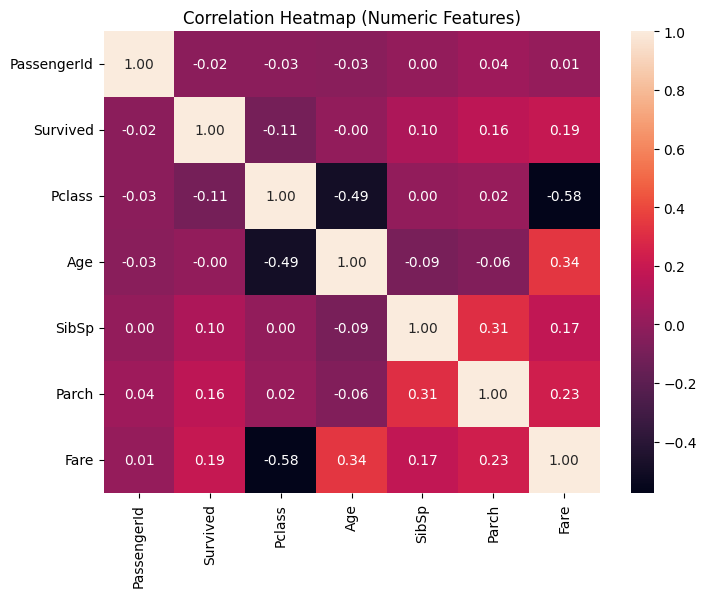

In [22]:
# Select only numeric columns
num_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(8,6))
sns.heatmap(num_df.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


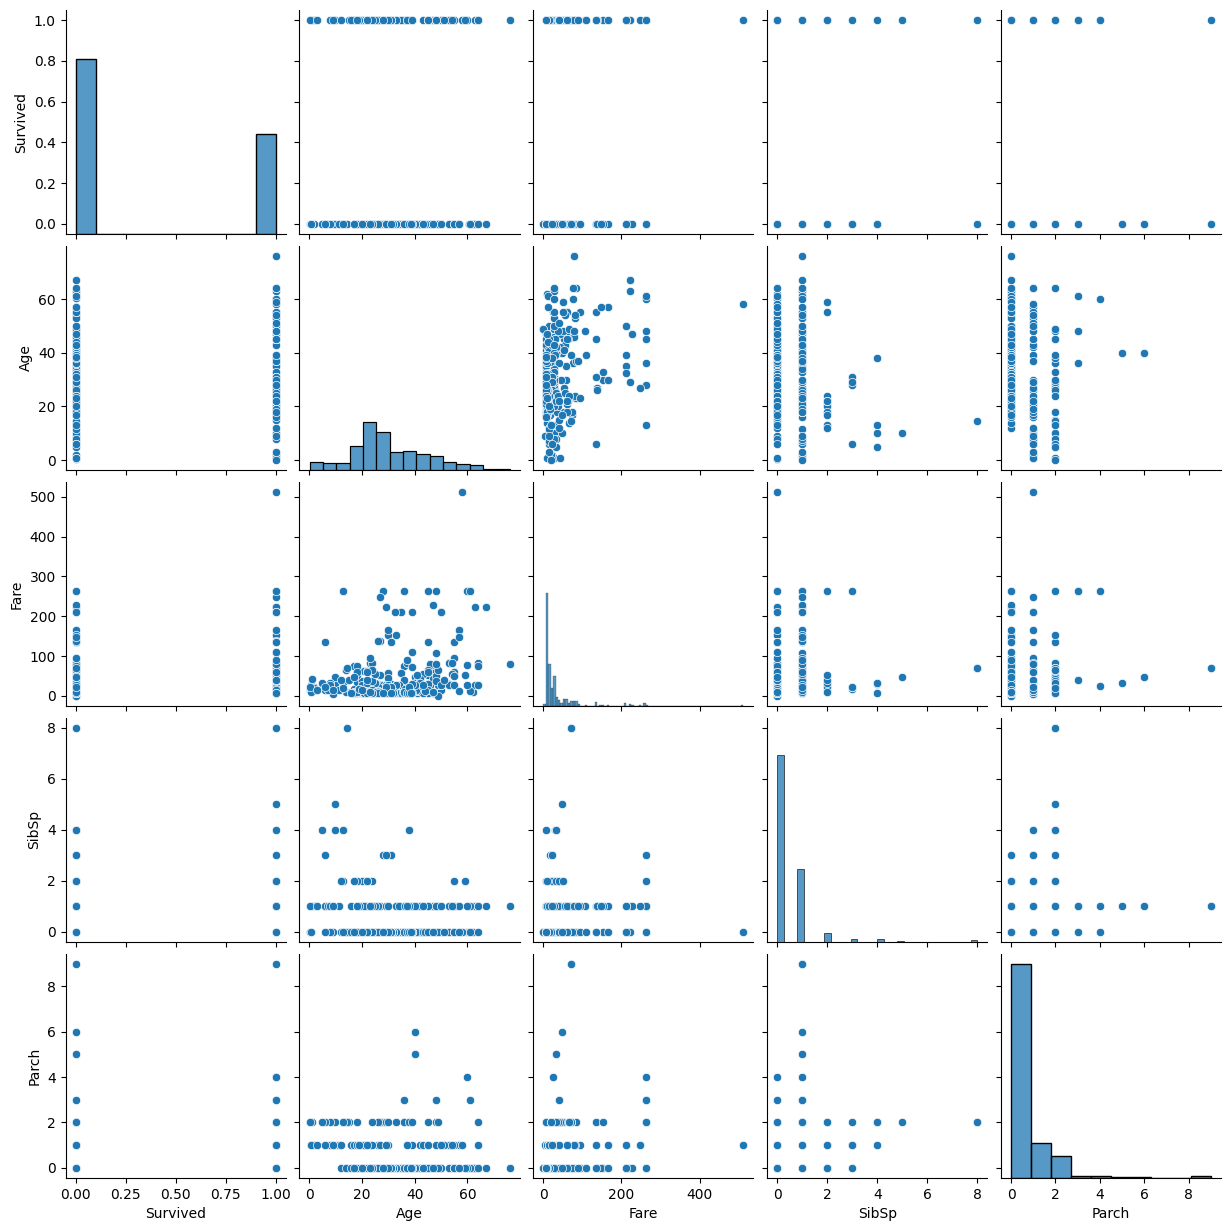

In [21]:
sns.pairplot(num_df[['Survived', 'Age', 'Fare', 'SibSp', 'Parch']])
plt.show()
